# Empirical constraints: an overview

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_helpers import *
import seaborn as sns

In [25]:
dtypes={"Label":str, "rho0":np.float64, "E/aA": np.float64}
data_skyrme=pd.read_csv("data/satpoints_skyrme.csv", comment="#", dtype=dtypes)
data_skyrme["type"]="Skyrme"
data_rmf=pd.read_csv("data/satpoints_rmf.csv", comment="#", dtype=dtypes)
data_rmf["type"]="RMF"
data_FC1=pd.read_csv("data/forChristan_samples1.csv",comment="#", names=["rho0","E/A"])
data_FC2=pd.read_csv("data/forChristan_samples2.csv",comment="#", names=["rho0","E/A"])
data_FC3=pd.read_csv("data/forChristan_samples3.csv",comment="#", names=["rho0","E/A"])
data_FC1["type"]="Schunck"
data_FC2["type"]="Schunck"
data_FC3["type"]="Schunck"
data_FC1["Label"]="UNEDF"
data_FC2["Label"]="UNEDF"
data_FC3["Label"]="UNEDF"

data=pd.concat([data_skyrme, data_rmf, data_FC1, data_FC2, data_FC3])






data.tail(n=12)

,Label,rho0,E/A,type
5988,UNEDF,0.155741,-15.714737,Schunck
5989,UNEDF,0.155969,-15.776474,Schunck
5990,UNEDF,0.155711,-15.768158,Schunck
5991,UNEDF,0.155931,-15.747983,Schunck
5992,UNEDF,0.156699,-15.782378,Schunck
5993,UNEDF,0.156109,-15.720015,Schunck
5994,UNEDF,0.156056,-15.725898,Schunck
5995,UNEDF,0.155219,-15.712381,Schunck
5996,UNEDF,0.155984,-15.724321,Schunck
5997,UNEDF,0.155629,-15.763643,Schunck


## Plot the data

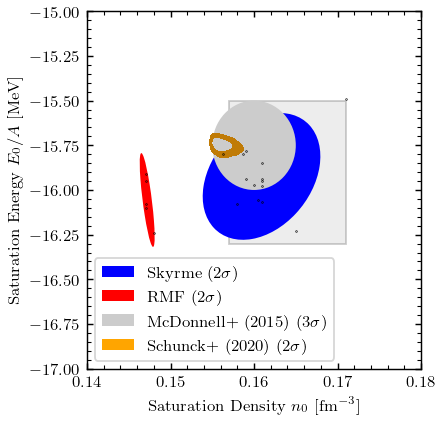

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8.6*cm, 8.2*cm), constrained_layout=True)

legend_elements=[]
for imodel,model in enumerate(("Skyrme", "RMF")):
    masked_data=data[data["type"]==model]
    color=colorset[imodel]
    confidence_ellipse(masked_data["rho0"], masked_data["E/A"], 
                       ax, n_std=2.0, facecolor=color, show_scatter=True)
    legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor=color, label=f"{model} (2$\\sigma$)"))
    

plot_empirical_saturation(ax=ax, zorder=-3)

color=facecolor="0.8"
confidence_ellipse_mean_cov([np.mean([0.155,0.165]),np.mean([-16, -15.5])], np.diag([0.005,0.25])**2, 
                            ax=ax, n_std=1, facecolor="0.8")
legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor=color, label=f"McDonnell+ (2015) (3$\\sigma$)"))
# 0.155 ≤ ρc ≤ 0.165 (fm−3 ); −16.0 ≤ E NM /A ≤ −15.5 (MeV);


def plotkde(filename):
    data1 = np.loadtxt(filename, delimiter=',', skiprows=1)
    sns.kdeplot(x=data1[:,0], y=data1[:,1], fill=True, levels=[.05,.32], color="orange")
    legend_elements.append(Ellipse((0, 0), width=1, height=1, facecolor="orange", label=f"Schunck+ (2020) (2$\\sigma$)"))   
     
plotkde("data/forChristan_samples1.csv")
#plotkde("data/forChristan_samples2.csv")
#plotkde("data/forChristan_samples3.csv")

ax.legend(handles=legend_elements, loc='best')

ax.set_xlim(0.14, 0.18)
ax.set_ylim(-17, -15.)
ax.set_xlabel('Saturation Density $n_0$ [fm$^{-3}$]')
ax.set_ylabel('Saturation Energy $E_0/A$ [MeV]')
fig.savefig("saturation.pdf")